# Non-linear equations and root-finding

Often we may encounter a problem where we need to find a root of an equation
$$
f(x) = 0
$$
that we cannot solve explicitly.
The solution can be obtained using numerical methods.

The most common methods are:

- Non-local (two-point) methods
    - Bisection method
    - False position method
    - Secant method
- Local methods
    - Newton method
    - Quasi-newton methods
    - Iteration method

### Bisection method

Let us consider an equation 
$$
x+e^{-x}-2 = 0,
$$
i.e. $f(x) = x+e^{-x}-2$.

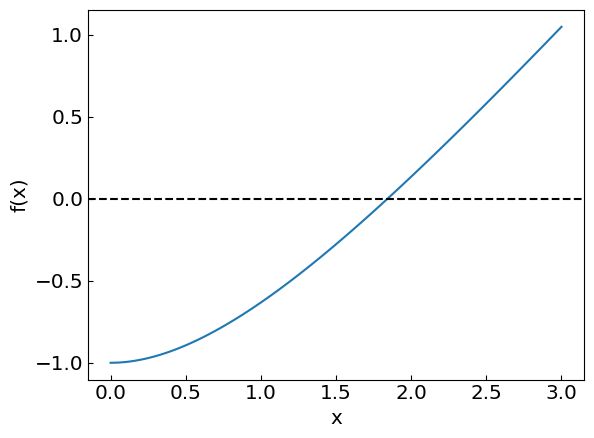

In [312]:
import numpy as np

def func1(x):
    return x + np.exp(-x) - 2.

xref = np.linspace(0,3,100)
fref = func1(xref)

import matplotlib.pyplot as plt
# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref)
plt.axhline(y = 0., color = 'black', linestyle = '--',label='max. error')
#plt.plot([1.841406], [0], 'ro')
plt.show()

For $x>0$ the equation $f(x) = 0$ has a root at $x \approx 1.84...$

The idea of the bisection method is to consider an interval $a<x<b$ such that $f(a) * f(b) < 0$, i.e. the function $f(x)$ has opposite signs at the edges of the interval. If the function is continuous, this implies that it has at least one root $f(x) = 0$ for $a < x < b$. The bisection method halves the initial $(a,b)$ interval at each step until the solution is found with the desired precision.

In [313]:
last_bisection_iterations = 0  # Count how many interactions it took
bisection_verbose = True

def bisection_method(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    ):
    fa = f(a)                           # The value of the function at the left boundary
    fb = f(b)                           # The value of the function at the right boundary
    if (fa * fb > 0.):
        return None                     # Bisection method is not applicable
    
    global last_bisection_iterations
    last_bisection_iterations = 0
    
    
    while ((b-a) > tolerance):
        last_bisection_iterations += 1
        c = (a + b) / 2.                # Take the midpoint
        fc = f(c)                       # Calculate the function at midpoint
        
        
        if bisection_verbose:
            print("Iteration: {0:5}, c = {1:20.15f}, f(c) = {2:10.15f}".format(last_bisection_iterations, c, fc))
        
        if (fc * fa < 0.):              
            b = c                       # The midpoint is the new right boundary
            fb = fc
        else:                           
            a = c                       # The midpoint is the new left boundary
            fa = fc

    return (a+b) / 2.                   

In [314]:
# The default desired accuracy
accuracy = 1.e-10

Solving the equation x + e^-x - 2 = 0 on an interval ( 0.0 , 3.0 ) using bisection method
Iteration:     1, c =    1.500000000000000, f(c) = -0.276869839851570
Iteration:     2, c =    2.250000000000000, f(c) = 0.355399224561864
Iteration:     3, c =    1.875000000000000, f(c) = 0.028354966844928
Iteration:     4, c =    1.687500000000000, f(c) = -0.127518600092696
Iteration:     5, c =    1.781250000000000, f(c) = -0.050322518721816
Iteration:     6, c =    1.828125000000000, f(c) = -0.011160374631956
Iteration:     7, c =    1.851562500000000, f(c) = 0.008554175081233
Iteration:     8, c =    1.839843750000000, f(c) = -0.001314006731460
Iteration:     9, c =    1.845703125000000, f(c) = 0.003617373389399
Iteration:    10, c =    1.842773437500000, f(c) = 0.001151003645707
Iteration:    11, c =    1.841308593750000, f(c) = -0.000081671712691
Iteration:    12, c =    1.842041015625000, f(c) = 0.000534623455207
Iteration:    13, c =    1.841674804687500, f(c) = 0.000226465239541
Iterati

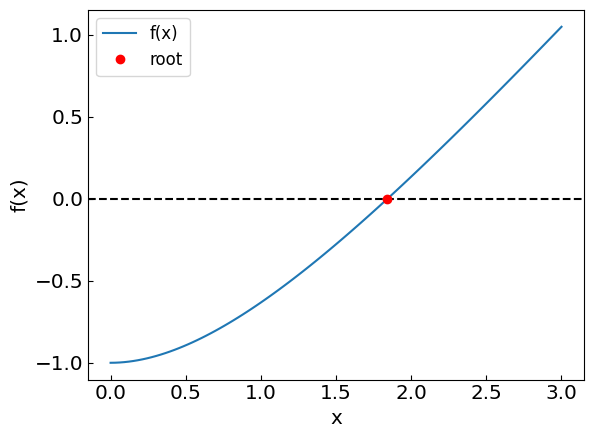

In [315]:
a = 0.
b = 3.
print("Solving the equation x + e^-x - 2 = 0 on an interval (", a, ",", b, ") using bisection method")
bisection_verbose = True
xroot = bisection_method(func1,a,b,accuracy)
print("The solution is x = ", xroot, " obtained with ", last_bisection_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func1(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

Let us try a polynomial equation with a single real root:
$$
f(x) = x^3 - x - 1
$$

Iteration:     1, c =    1.500000000000000, f(c) = 0.875000000000000
Iteration:     2, c =    0.750000000000000, f(c) = -1.328125000000000
Iteration:     3, c =    1.125000000000000, f(c) = -0.701171875000000
Iteration:     4, c =    1.312500000000000, f(c) = -0.051513671875000
Iteration:     5, c =    1.406250000000000, f(c) = 0.374664306640625
Iteration:     6, c =    1.359375000000000, f(c) = 0.152614593505859
Iteration:     7, c =    1.335937500000000, f(c) = 0.048348903656006
Iteration:     8, c =    1.324218750000000, f(c) = -0.002127945423126
Iteration:     9, c =    1.330078125000000, f(c) = 0.022973485291004
Iteration:    10, c =    1.327148437500000, f(c) = 0.010388596914709
Iteration:    11, c =    1.325683593750000, f(c) = 0.004121791920625
Iteration:    12, c =    1.324951171875000, f(c) = 0.000994790971163
Iteration:    13, c =    1.324584960937500, f(c) = -0.000567110148040
Iteration:    14, c =    1.324768066406250, f(c) = 0.000213707162629
Iteration:    15, c =    1.32

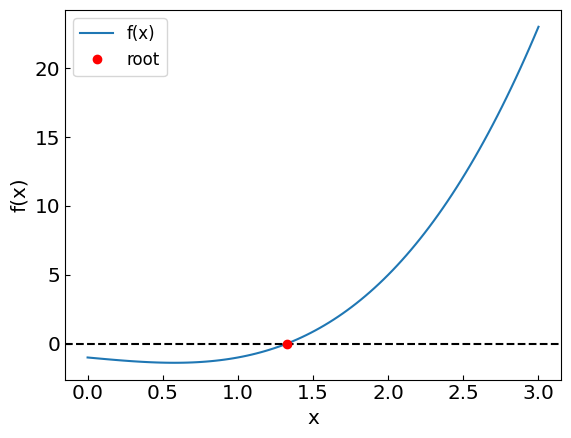

In [316]:
def func2(x):
    return x**3 - x - 1.

a = 0.
b = 3.
xroot = bisection_method(func2, a, b, accuracy)
print("The solution is x = ", xroot, " obtained with ", last_bisection_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func2(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

### False position method

In the false position method instead of choosing the midpoint, we choose the point where the straight line between current interval edges crosses the $y = 0$ axis.

![falseposition](falseposition.png)

In [317]:
last_falseposition_iterations = 0
falseposition_verbose = True

def falseposition_method(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Maximum number of iterations
    ):
    fa = f(a)                           # The value of the function at the left boundary
    fb = f(b)                           # The value of the function at the right boundary
    if (fa * fb > 0.):
        return None                     # False position method is not applicable
    
    xprev = xnew = (a+b) / 2.                  # Estimate of the solution from the previous step  
    
    global last_falseposition_iterations
    last_falseposition_iterations = 0
    
    for i in range(max_iterations):
        last_falseposition_iterations += 1
        
        xprev = xnew
        xnew = a - fa * (b - a) / (fb - fa) # Take the point where straight line between a and b crosses y = 0
        fnew = f(xnew)                      # Calculate the function at midpoint

        if falseposition_verbose:
            print("Iteration: {0:5}, x = {1:20.15f}, f(x) = {2:10.15f}".format(last_falseposition_iterations, xnew, fnew))
        
        if (fnew * fa < 0.):              
            b = xnew                        # The intersection is the new right boundary
            fb = fnew
        else:                           
            a = xnew                        # The midpoint is the new left boundary
            fa = fnew
    
        if (abs(xnew-xprev) < tolerance):
            return xnew
    
    print("False position method failed to converge to a required precision in " + str(max_iterations) + " iterations")
    print("The error estimate is ", abs(xnew - xprev))
    
    return xnew                   

Solving the equation x + e^-x - 2 = 0 on an interval ( 0.0 , 3.0 ) using the false position method
Iteration:     1, x =    1.463566653481105, f(x) = -0.305023902720619
Iteration:     2, x =    1.809481253839539, f(x) = -0.026779692379373
Iteration:     3, x =    1.839095511827520, f(x) = -0.001943348598294
Iteration:     4, x =    1.841240588240115, f(x) = -0.000138890519932
Iteration:     5, x =    1.841393875903701, f(x) = -0.000009915561978
Iteration:     6, x =    1.841404819191791, f(x) = -0.000000707828391
Iteration:     7, x =    1.841405600384506, f(x) = -0.000000050528475
Iteration:     8, x =    1.841405656150106, f(x) = -0.000000003606984
Iteration:     9, x =    1.841405660130943, f(x) = -0.000000000257485
Iteration:    10, x =    1.841405660415115, f(x) = -0.000000000018381
Iteration:    11, x =    1.841405660435401, f(x) = -0.000000000001312
The solution is x =  1.8414056604354012 obtained after  11  iterations


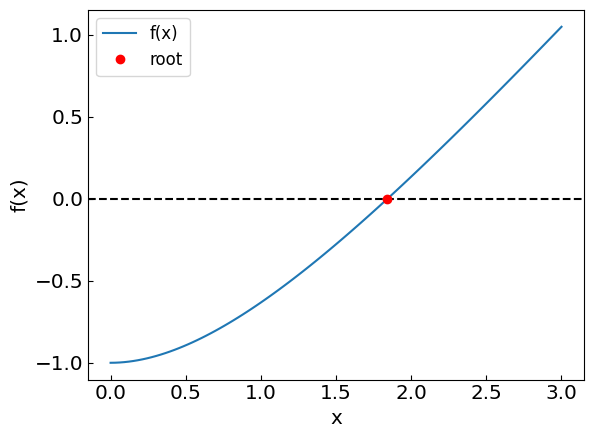

In [318]:
a = 0.
b = 3.
print("Solving the equation x + e^-x - 2 = 0 on an interval (", a, ",", b, ") using the false position method")
xroot = falseposition_method(func1, a, b, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_falseposition_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func1(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

Solving the equation x^3 - x - 1 = 0 on an interval ( 0.0 , 3.0 ) using the false position method
Iteration:     1, x =    0.125000000000000, f(x) = -1.123046875000000
Iteration:     2, x =    0.258845437616387, f(x) = -1.241502544655680
Iteration:     3, x =    0.399230727605107, f(x) = -1.335599268673875
Iteration:     4, x =    0.541967526475374, f(x) = -1.382776055418208
Iteration:     5, x =    0.681365453934702, f(x) = -1.365035490183169
Iteration:     6, x =    0.811265467641601, f(x) = -1.277329754233812
Iteration:     7, x =    0.926423756077868, f(x) = -1.131310399158622
Iteration:     8, x =    1.023635980751716, f(x) = -0.951038855271058
Iteration:     9, x =    1.102112700940041, f(x) = -0.763428857530277
Iteration:    10, x =    1.163084623011103, f(x) = -0.589703475641066
Iteration:    11, x =    1.209004461867383, f(x) = -0.441812567314840
Iteration:    12, x =    1.242759715838447, f(x) = -0.323377345963561
Iteration:    13, x =    1.267123755869329, f(x) = -0.23262654

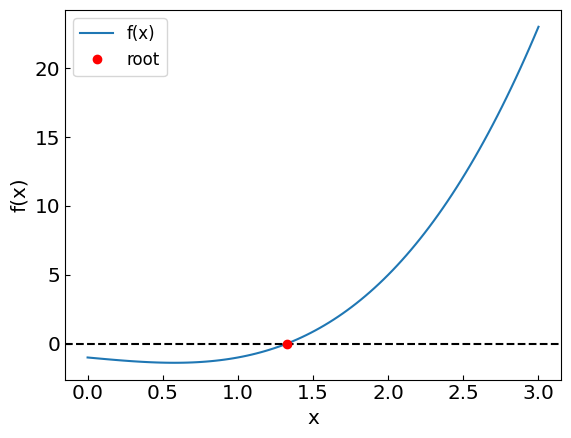

In [319]:
a = 0.
b = 3.
print("Solving the equation x^3 - x - 1 = 0 on an interval (", a, ",", b, ") using the false position method")
xroot = falseposition_method(func2, a, b, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_falseposition_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func2(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

In [325]:
last_secant_iterations = 0
secant_verbose = True

def secant_method(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Maximum number of iterations
    ):
    fa = f(a)                           # The value of the function at the left boundary
    fb = f(b)                           # The value of the function at the right boundary
    
    xprev = xnew = a                           # Estimate of the solution from the previous step  
    
    global last_secant_iterations
    last_secant_iterations = 0
    
    for i in range(max_iterations):
        last_secant_iterations += 1
        
        xprev = xnew
        xnew = a - fa * (b - a) / (fb - fa) # Take the point where straight line between a and b crosses y = 0
        fnew = f(xnew)                      # Calculate the function at midpoint
        
        if secant_verbose:
            print("Iteration: {0:5}, x = {1:20.15f}, f(x) = {2:10.15f}".format(last_secant_iterations, xnew, fnew))
        
        b = a
        fb = fa
        a = xnew
        fa = fnew
    
        if (abs(xnew-xprev) < tolerance):
            return xnew
    
    print("Secant method failed to converge to a required precision in " + str(max_iterations) + " iterations")
    print("The error estimate is ", abs(xnew - xprev))
    
    return xnew                   

Solving the equation x + e^-x - 2 = 0 on an interval ( 0.0 , 3.0 ) using the secant method
Iteration:     1, x =    1.463566653481105, f(x) = -0.305023902720619
Iteration:     2, x =    2.105923727751964, f(x) = 0.227656901758072
Iteration:     3, x =    1.831393427201715, f(x) = -0.008416373991634
Iteration:     4, x =    1.841180853051291, f(x) = -0.000189150198961
Iteration:     5, x =    1.841405873494811, f(x) = 0.000000179268085
Iteration:     6, x =    1.841405660432446, f(x) = -0.000000000003799
Iteration:     7, x =    1.841405660436961, f(x) = 0.000000000000000
The solution is x =  1.8414056604369606 obtained after  7  iterations


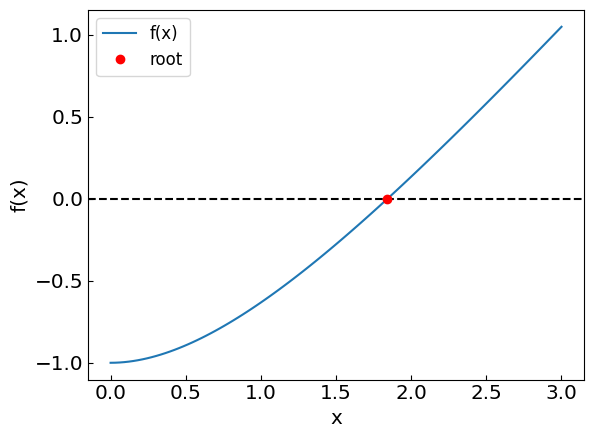

In [326]:
a = 0.
b = 3.
print("Solving the equation x + e^-x - 2 = 0 on an interval (", a, ",", b, ") using the secant method")
xroot = secant_method(func1, a, b, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_secant_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func1(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

Solving the equation x^3 - x - 1 = 0 on an interval ( 0.0 , 3.0 ) using the secant method
Iteration:     1, x =    0.125000000000000, f(x) = -1.123046875000000
Iteration:     2, x =   -1.015873015873016, f(x) = -1.032505888892888
Iteration:     3, x =  -14.026092564115256, f(x) = -2746.344947419933305
Iteration:     4, x =   -1.010979901305751, f(x) = -1.022322801027050
Iteration:     5, x =   -1.006133240911884, f(x) = -1.012379562467959
Iteration:     6, x =   -0.512666258317272, f(x) = -0.622076118670072
Iteration:     7, x =    0.273834681149844, f(x) = -1.253301069122821
Iteration:     8, x =   -1.287767830907429, f(x) = -1.847796782789951
Iteration:     9, x =    3.565966235528240, f(x) = 40.779271189538719
Iteration:    10, x =   -1.077368321415013, f(x) = -1.173157330026346
Iteration:    11, x =   -0.947522156044583, f(x) = -0.903161564408282
Iteration:    12, x =   -0.513174359589628, f(x) = -0.621969042319750
Iteration:    13, x =    0.447558454314033, f(x) = -1.3579086603264

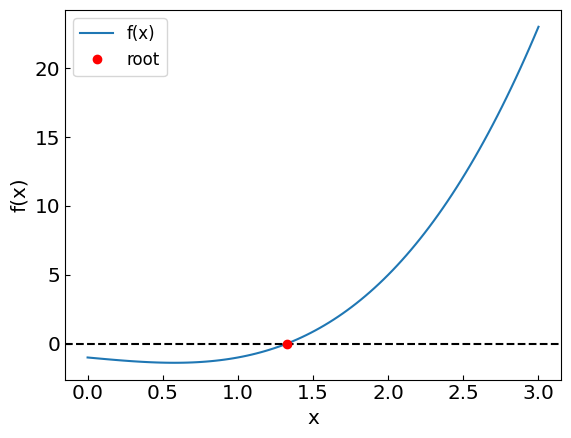

In [300]:
a = 0.
b = 3.
print("Solving the equation x^3 - x - 1 = 0 on an interval (", a, ",", b, ") using the secant method")
xroot = secant_method(func2, a, b, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_secant_iterations, " iterations")
""
# Plotting
xref = np.linspace(0,3,100)
fref = func2(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

31 iterations!

Why so many compared to the previous example?

See the animation

![img-secant2](secant-func2.gif)

The method is not convergent during the initial phase.
The reasons is that the interval (0,3) covers a point $x = 1/\sqrt{3} = 0.577...$ where the derivative is zero $f'(x) = 0$. In this case we can go far outside the initial interval and lose convergence.

Let us try to reduce the interval to (1,3)

Solving the equation x^3 - x - 1 = 0 on an interval ( 1.0 , 3.0 ) using the secant method
Iteration:     1, x =    1.083333333333333, f(x) = -0.811921296296297
Iteration:     2, x =    1.443076923076923, f(x) = 0.562088928538917
Iteration:     3, x =    1.295910704621766, f(x) = -0.119578283458892
Iteration:     4, x =    1.321726650403328, f(x) = -0.012721292233753
Iteration:     5, x =    1.324800030879539, f(x) = 0.000350040702043
Iteration:     6, x =    1.324717728006158, f(x) = -0.000000977618237
Iteration:     7, x =    1.324717957227214, f(x) = -0.000000000074767
Iteration:     8, x =    1.324717957244746, f(x) = 0.000000000000000
The solution is x =  1.324717957244746 obtained after  8  iterations


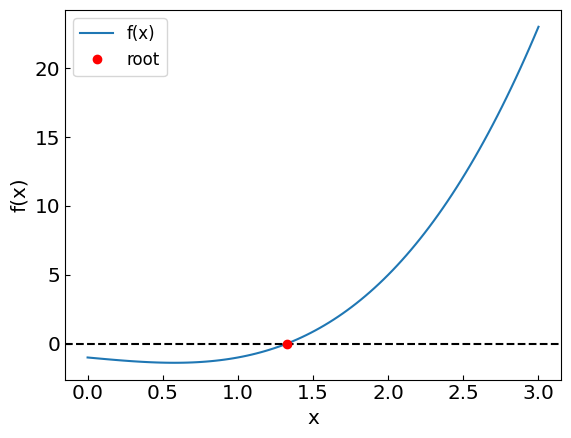

In [301]:
a = 1.
b = 3.
print("Solving the equation x^3 - x - 1 = 0 on an interval (", a, ",", b, ") using the secant method")
xroot = secant_method(func2, a, b, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_secant_iterations, " iterations")
""
# Plotting
xref = np.linspace(0,3,100)
fref = func2(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

## Newton-Raphson method

Newton's method is a local method. 

Let us assume that a given point $x$ is close to the root $x^*$, where $f(x^*) = 0$.

We can express $f(x^*)$ by expanding it around x:
$$
f(x^*) \approx f(x) + f'(x) (x^* - x)
$$

Given that $f(x^*) = 0$, we can express the root $x^*$ as
$$
x^* \approx x - \frac{f(x)}{f'(x)}
$$
which is accurate is $x$ is sufficiently close to $x^*$.

Newton-Raphson method is an iterative procedure to find $x^*$.
The $(n+1)$th approximation is
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

The method is expected to work well if the initial guess $x_0$ is not too far from $x$ and/or we avoid regions where $f'(x) = 0$. The method converges faster than other methods considered so far but requires the evaluation of the derivative $f'$ at each step.

![newton](newton.png)

In [328]:
last_newton_iterations = 0
newton_verbose = False

def newton_method(
    f,                    # The function whose root we are trying to find
    df,                   # The derivative of the function
    x0,                   # The initial guess
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Maximum number of iterations
    ):
    
    xprev = xnew = x0
    
    global last_newton_iterations
    last_newton_iterations = 0
    
    if newton_verbose:
        print("Iteration: {0:5}, x = {1:20.15f}, f(x) = {2:10.15f}".format(last_newton_iterations, x0, f(x0)))
    
    for i in range(max_iterations):
        last_newton_iterations += 1
           
        xprev = xnew
        fval  = f(xprev)                       # The current function value
        dfval = df(xprev)                      # The current function derivative value
        
        xnew = xprev - fval / dfval            # The next iteration
        
        if newton_verbose:
            print("Iteration: {0:5}, x = {1:20.15f}, f(x) = {2:10.15f}".format(last_newton_iterations, xnew, f(xnew)))

        if (abs(xnew-xprev) < tolerance):
            return xnew
        
    
    print("Newton-Raphson method failed to converge to a required precision in " + str(max_iterations) + " iterations")
    print("The error estimate is ", abs(xnew-xprev))
    
    return xnew                   

Solving the equation x + e^-x - 2 = 0 with an initial guess of x0 =  0.5
Iteration:     0, x =    0.500000000000000, f(x) = -0.893469340287367
Iteration:     1, x =    2.770747041268399, f(x) = 0.833362252387609
Iteration:     2, x =    1.881718050961633, f(x) = 0.034046224211712
Iteration:     3, x =    1.841553658165603, f(x) = 0.000124527863398
Iteration:     4, x =    1.841405662500950, f(x) = 0.000000001736652
Iteration:     5, x =    1.841405660436960, f(x) = -0.000000000000000
Iteration:     6, x =    1.841405660436961, f(x) = 0.000000000000000
The solution is x =  1.8414056604369606 obtained after  6  iterations


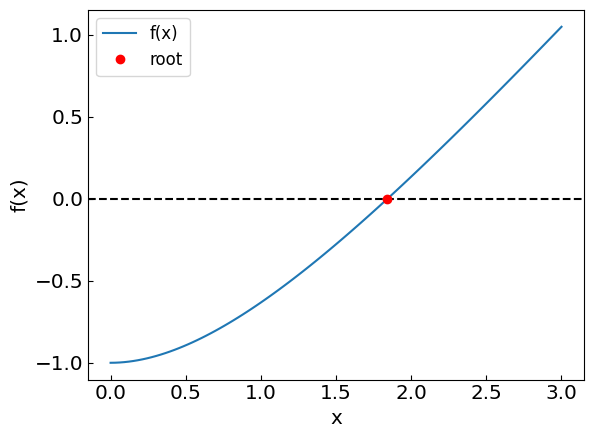

In [335]:
# Recall function 1
def func1(x):
    return x + np.exp(-x) - 2.

# Now we have to define the derivative
def dfunc1(x):
    return 1. - np.exp(-x)

# Initial guess
x0 = 0.5

print("Solving the equation x + e^-x - 2 = 0 with an initial guess of x0 = ", x0)
newton_verbose = True
xroot = newton_method(func1, dfunc1, x0, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_newton_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func1(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

Solving the equation x^3 - x - 1 = 0 with an initial guess of x0 =  0.5
Iteration:     0, x =    0.500000000000000, f(x) = -1.375000000000000
Iteration:     1, x =   -5.000000000000000, f(x) = -121.000000000000000
Iteration:     2, x =   -3.364864864864865, f(x) = -35.733196947860939
Iteration:     3, x =   -2.280955053664953, f(x) = -10.586297439073974
Iteration:     4, x =   -1.556276567967263, f(x) = -3.213020231094429
Iteration:     5, x =   -1.043505227179037, f(x) = -1.092770911285728
Iteration:     6, x =   -0.561409518771311, f(x) = -0.615535897017610
Iteration:     7, x =  -11.864344921350634, f(x) = -1659.192647549701178
Iteration:     8, x =   -7.925964323903187, f(x) = -490.990330807181920
Iteration:     9, x =   -5.306828631368327, f(x) = -145.146361872742261
Iteration:    10, x =   -3.568284222599895, f(x) = -42.865438067273487
Iteration:    11, x =   -2.415924209768375, f(x) = -12.685075952386104
Iteration:    12, x =   -1.647600608320907, f(x) = -3.824955843874735
Itera

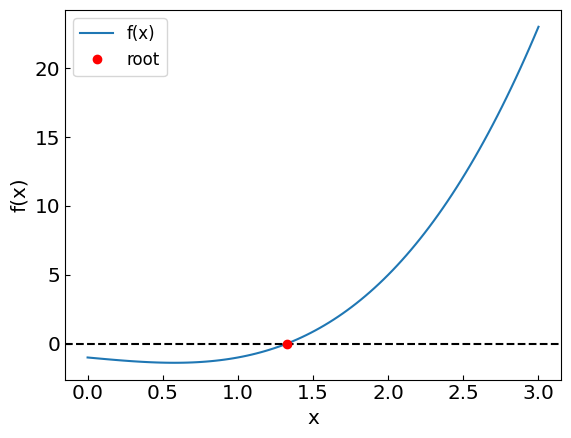

In [336]:
# Recall function 1
def func2(x):
    return x**3 - x - 1.

# Now we have to define the derivative
def dfunc2(x):
    return 3. * x**2 - 1.

# Initial guess
x0 = 0.50

print("Solving the equation x^3 - x - 1 = 0 with an initial guess of x0 = ", x0)
newton_verbose = True
xroot = newton_method(func2, dfunc2, x0, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_newton_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func2(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

For an unfortunate choice of initial guess the Newton-Raphson method can enter a loop

Solving the equation x^3 - 2x - 2 = 0 with an initial guess of x0 =  0.2
Iteration:     0, x =    0.200000000000000, f(x) = 1.608000000000000
Iteration:     1, x =    1.055319148936170, f(x) = 1.064669061768587
Iteration:     2, x =    0.261439035839439, f(x) = 1.494991383012186
Iteration:     3, x =    1.094327030585932, f(x) = 1.121859079804777
Iteration:     4, x =    0.389931467644111, f(x) = 1.279424798892584
Iteration:     5, x =    1.218649426200272, f(x) = 1.372525239026891
Iteration:     6, x =    0.659648706939285, f(x) = 0.967739760651828
Iteration:     7, x =    2.052900431402751, f(x) = 6.545943087393848
Iteration:     8, x =    1.437865220849364, f(x) = 2.096993201890540
Iteration:     9, x =    0.938862607780933, f(x) = 0.949847431796620
Iteration:    10, x =   -0.535165422191687, f(x) = 2.917058381558375
Iteration:    11, x =    2.021876957818959, f(x) = 6.221651656230159
Iteration:    12, x =    1.415712077796703, f(x) = 2.006003592114745
Iteration:    13, x =    0.915

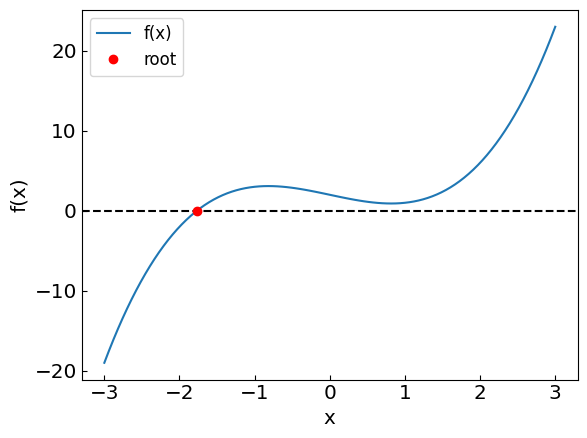

In [348]:
# The method ends up in a cycle
def func3(x):
    return x**3 - 2. * x + 2.

# Now we have to define the derivative
def dfunc3(x):
    return 3. * x**2 - 2.

# Initial guess
x0 = 0.2

print("Solving the equation x^3 - 2x - 2 = 0 with an initial guess of x0 = ", x0)
newton_verbose = True
xroot = newton_method(func3, dfunc3, x0, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_newton_iterations, " iterations")

# Plotting
xref = np.linspace(-3,3,100)
fref = func3(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

![newton-3](newton-func3.gif)

## Relaxation method

Another local method is iteration (or relaxation) method

The idea is to rewrite the equation
$$
f(x) = 0
$$
in a form
$$
x = \varphi(x).
$$
This is always possible to do, for instance by choosing $\varphi(x) = f(x) + x$, although this choice of $\varphi(x)$ is not unique.

The root $x^*$ of this equation is approximated iteratively starting from some initial guess $x_0$
$$
x_{n+1} = \varphi(x_n).
$$

It turns out that this iterative procedure in some cases converges quickly (as a geometric progression) to the root $x^*$.
Namely, this is the case if the derivative
$$
|\varphi'(x)| < 1
$$
for all $x$ in the interval of value covered by all $x_i$.

In [343]:
last_relaxation_iterations = 0
relaxation_verbose = True

def relaxation_method(
    phi,                  # The function from the equation x = phi(x)
    x0,                   # The initial guess
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Maximum number of iterations
    ):
    
    xprev = xnew = x0
    
    global last_relaxation_iterations
    last_relaxation_iterations = 0
    
    if relaxation_verbose:
        print("Iteration: {0:5}, x = {1:20.15f}, phi(x) = {2:10.15f}".format(last_relaxation_iterations, x0, phi(x0)))
    
    for i in range(max_iterations):
        last_relaxation_iterations += 1
        
        xprev = xnew
        xnew = phi(xprev) # The next iteration
        
        if relaxation_verbose:
            print("Iteration: {0:5}, x = {1:20.15f}, phi(x) = {2:10.15f}".format(last_relaxation_iterations, xnew, phi(xnew)))

        if (abs(xnew-xprev) < tolerance):
            return xnew
        
    
    print("The iteration method failed to converge to a required precision in " + str(max_iterations) + " iterations")
    print("The error estimate is ", abs(xnew - xprev))
    
    return xnew                   

Solving the equation x = 2 - e^-x with relaxation method an initial guess of x0 =  0.5
Iteration:     0, x =    0.500000000000000, phi(x) = 1.393469340287367
Iteration:     1, x =    1.393469340287367, phi(x) = 1.751787325113973
Iteration:     2, x =    1.751787325113973, phi(x) = 1.826536369684999
Iteration:     3, x =    1.826536369684999, phi(x) = 1.839029855597129
Iteration:     4, x =    1.839029855597129, phi(x) = 1.841028423293983
Iteration:     5, x =    1.841028423293983, phi(x) = 1.841345821475382
Iteration:     6, x =    1.841345821475382, phi(x) = 1.841396170032424
Iteration:     7, x =    1.841396170032424, phi(x) = 1.841404155305379
Iteration:     8, x =    1.841404155305379, phi(x) = 1.841405421731432
Iteration:     9, x =    1.841405421731432, phi(x) = 1.841405622579610
Iteration:    10, x =    1.841405622579610, phi(x) = 1.841405654432999
Iteration:    11, x =    1.841405654432999, phi(x) = 1.841405659484766
Iteration:    12, x =    1.841405659484766, phi(x) = 1.841405

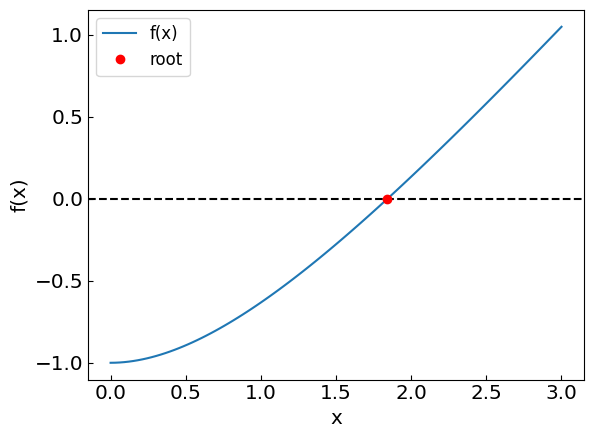

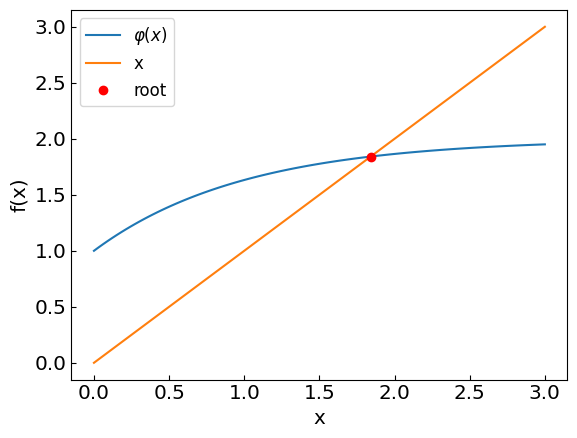

In [344]:
# Recall the equation x + e^-x - 2 = 0, rewrite as x = phi(x), where phi(x) = 2 - e^-x
def phi1(x):
    return 2. - np.exp(-x)

# Initial guess
x0 = 0.5

print("Solving the equation x = 2 - e^-x with relaxation method an initial guess of x0 = ", x0)
xroot = relaxation_method(phi1, x0, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_relaxation_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func1(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()


phiref = phi1(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,phiref, label = '${\\varphi(x)}$')
plt.plot(xref,xref, label = 'x')
plt.plot([xroot], [xroot], 'ro',label='root')
plt.legend()
plt.show()

In [345]:
# Recall the equation x^3 - x - 1 = 0, rewrite as x = phi(x), where phi(x) = x^3 - 1
def phi2(x):
    return x**3 - 1

# Initial guess
x0 = 0.

print("Solving the equation x = x^3 - 1 with relaxation method an initial guess of x0 = ", x0)
xroot = relaxation_method(phi2, x0, accuracy)
print("The solution is x = ", xroot, "obtained after ", last_relaxation_iterations, " iterations")

# Plotting
xref = np.linspace(0,3,100)
fref = func2(xref)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(xref,fref, label = 'f(x)')
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot([xroot], [0], 'ro',label='root')
plt.legend()
plt.show()

Solving the equation x = x^3 - 1 with relaxation method an initial guess of x0 =  0.0
Iteration:     0, x =    0.000000000000000, phi(x) = -1.000000000000000
Iteration:     1, x =   -1.000000000000000, phi(x) = -2.000000000000000
Iteration:     2, x =   -2.000000000000000, phi(x) = -9.000000000000000
Iteration:     3, x =   -9.000000000000000, phi(x) = -730.000000000000000
Iteration:     4, x = -730.000000000000000, phi(x) = -389017001.000000000000000
Iteration:     5, x = -389017001.000000000000000, phi(x) = -58871587162270591457689600.000000000000000
Iteration:     6, x = -58871587162270591457689600.000000000000000, phi(x) = -204040901322752646989478259680513109526757826056202557355691431285390611316736.000000000000000
Iteration:     7, x = -204040901322752646989478259680513109526757826056202557355691431285390611316736.000000000000000, phi(x) = -84947714722373876912426115385994721993330450340708886432958705831500286122585831451013021195433672849326160977228141311271042752909937066699

OverflowError: (34, 'Numerical result out of range')